**UE22MA242A: Mathematics for Computer Science Engineers**

Python tutorial: t-distribution and Confidence Interval

By:- Archishman VB (TA-MCSE)

# T-distribution


The t-distribution, also known as the Student’s t-distribution, is a statistical function that creates a probability distribution. The t-distribution is similar to the normal distribution, with its bell shape, but it has heavier tails. It is used for estimating population parameters for small sample sizes or unknown variances. T-distributions have a greater chance for extreme values than normal distributions, and as a result have fatter tails.

this distribution is used for t-tests in statistics.

The t-distribution is used in statistics to estimate the population parameters for small sample sizes or undetermined variances.

Tail heaviness is determined by a parameter of the t-distribution called degrees of freedom, with smaller values giving heavier tails, and with higher values making the t-distribution resemble a standard normal distribution with a mean of 0 and a standard deviation of 1


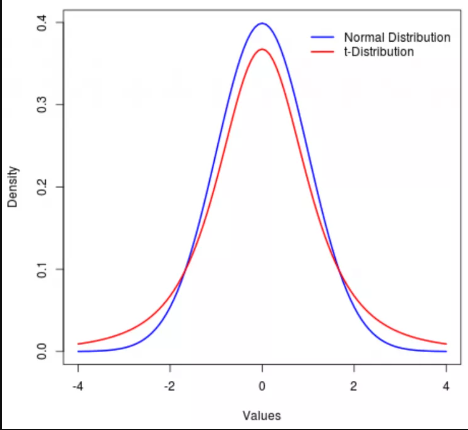

# Confidence Interval

A confidence interval, in statistics, refers to the probability that a population parameter will fall between a set of values for a certain proportion of times. Analysts often use confidence intervals that contain either 95% or 99% of expected observations. Thus, if a point estimate is generated from a statistical model of 10.00 with a 95% confidence interval of 9.50 to 10.50, it means one is 95% confident that the true value falls within that range.

Confidence intervals are conducted using statistical methods, such as a t-test.

A confidence interval is a range of values, bounded above and below the statistic's mean, that likely would contain an unknown population parameter. Confidence level refers to the percentage of probability, or certainty, that the confidence interval would contain the true population parameter when you draw a random sample many times.


Assignment:

In this assignment, you will analyze the performance of students in math, reading, and writing exams using t-tests to calculate confidence intervals. You'll investigate factors such as test preparation, parental education, and gender.

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
# 1. Exploratory Data Analysis (EDA)
# Display basic statistics and dataset info

In [ ]:
# Visualize the relationship between gender and exam scores
#visualize a boxplot of math scores, w.r.t gender.

In [8]:
# 2. Confidence Interval Calculation using t-tests

# Function to calculate confidence interval using t-test
def ttest_confidence_interval(data1, data2=None, confidence=0.95):
    if data2 is None:
        # One-sample t-test confidence interval
        mean = np.mean(data1)
        sem = stats.sem(data1)  # Standard error of the mean
        df = len(data1) - 1  # Degrees of freedom
        t_crit = stats.t.ppf((1 + confidence) / 2., df)  # t-critical value for two-tailed test
        margin_of_error = t_crit * sem
        return mean, mean - margin_of_error, mean + margin_of_error
    else:
        # Two-sample t-test confidence interval
        t_stat, p_value = stats.ttest_ind(data1, data2)
        mean_diff = np.mean(data1) - np.mean(data2)
        pooled_std_error = np.sqrt(stats.sem(data1)**2 + stats.sem(data2)**2)
        df = len(data1) + len(data2) - 2
        t_crit = stats.t.ppf((1 + confidence) / 2., df)
        margin_of_error = t_crit * pooled_std_error
        return mean_diff, mean_diff - margin_of_error, mean_diff + margin_of_error, p_value

In [ ]:
# 2.1 Confidence Interval for Math Scores (Test Preparation Course)
preparation_completed = df[df['test preparation course'] == 'completed']['math score']
preparation_none = df[df['test preparation course'] == 'none']['math score']

mean_diff, ci_low, ci_high, p_value = ttest_confidence_interval(preparation_completed, preparation_none)
print(f"Mean Difference (Test Preparation Completed vs None): {mean_diff}")
print(f"95% CI for Mean Difference: [{ci_low}, {ci_high}]")
print(f"P-value: {p_value}")

In [ ]:
# 2.2 Confidence Interval for Reading Scores (Parental Education Level)
bachelors_degree = df[df['parental level of education'] == "bachelor's degree"]['reading score']
high_school = df[df['parental level of education'] == 'high school']['reading score']

mean_diff_education, ci_low_education, ci_high_education, p_value_education = ttest_confidence_interval(bachelors_degree, high_school)
print(f"Mean Difference (Bachelor's Degree vs High School): {mean_diff_education}")
print(f"95% CI for Mean Difference: [{ci_low_education}, {ci_high_education}]")
print(f"P-value: {p_value_education}")

In [ ]:
# 2.3 Confidence Interval for Writing Scores (Gender Differences)
male_scores = df[df['gender'] == 'male']['writing score']
female_scores = df[df['gender'] == 'female']['writing score']

mean_diff_gender, ci_low_gender, ci_high_gender, p_value_gender = ttest_confidence_interval(male_scores, female_scores)
print(f"Mean Difference (Male vs Female): {mean_diff_gender}")
print(f"95% CI for Mean Difference: [{ci_low_gender}, {ci_high_gender}]")
print(f"P-value: {p_value_gender}")

# Discussion: Based on the results, interpret the confidence intervals and significance of differences between groups.


question: Based on the results of the t-tests for test preparation, parental education level, and gender, how would you interpret the mean differences, confidence intervals, and p-values in terms of the factors affecting students' performance? Specifically, what can you infer about the significance of each factor on students' scores, and how do the confidence intervals provide additional insights?

Try the same experiment for 99% confidence level, and answer the question above. Note the difference in p-value when confidence is 95% and 99%.